<a href="https://colab.research.google.com/github/daawonn/R_project/blob/master/4_%EA%B7%B8%EB%9E%98%ED%94%84_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## R로 만들 수 있는 그래프 살펴보기 
- 2차원 그래프, 3차원 그래프
- 지도 그래프 
- 네트워크 그래프 
- 모션 차트 
- 인터랙티브 그래프 

## 산점도 만들기 
- 산점도(Scater Plot) : 데이터를 x축과 y축에 점으로 표현한 그래프 
- 나이와 소득처럼, 연속 값으로 된 두 변수의 관계를 표현할 때 사용 

In [0]:
# ggplot2 로드
library(ggplot2) 

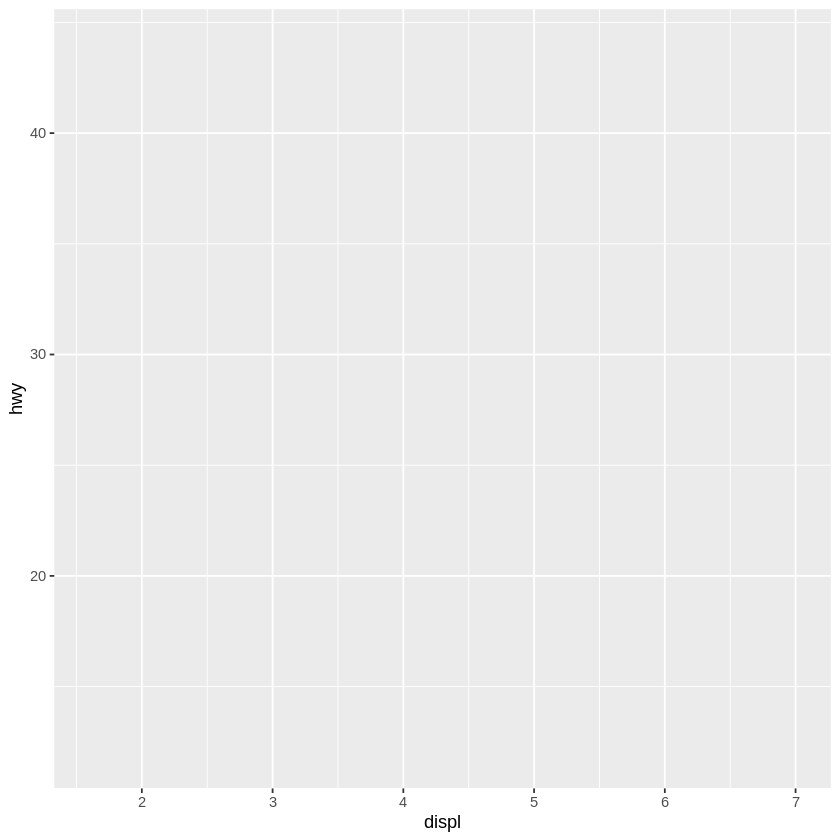

In [2]:
# 1. 배경 설정하기 
# x 축 displ, y 축 hwy 로 지정해 배경 생성
ggplot(data = mpg, aes(x = displ, y = hwy)) 

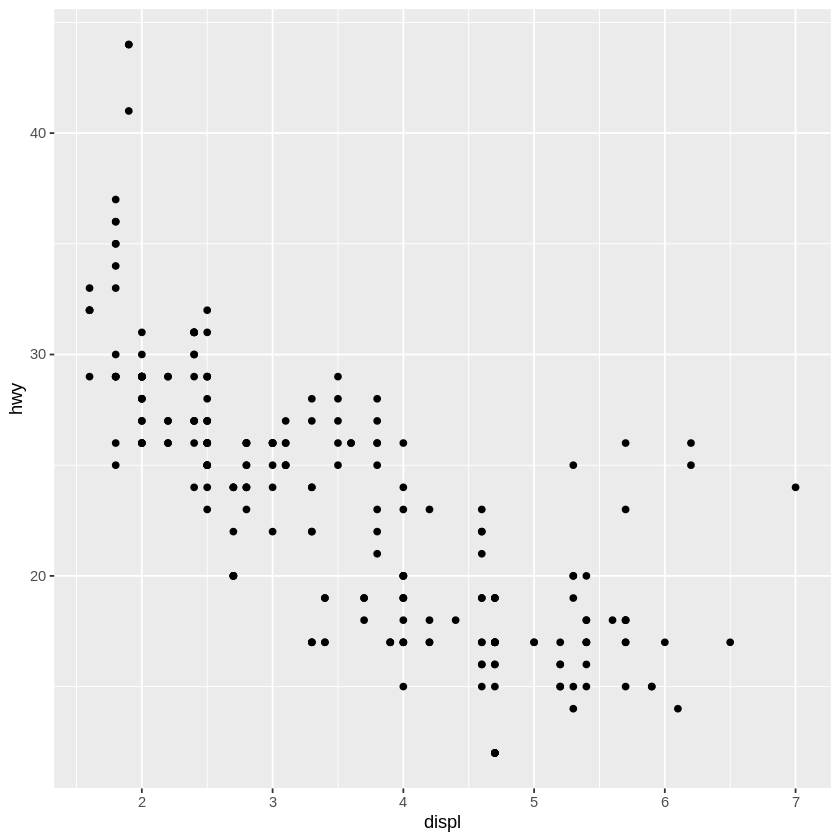

In [3]:
# 2. 그래프 추가하기 
# 배경에 산점도 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() 

Warning message:
“Removed 105 rows containing missing values (geom_point).”


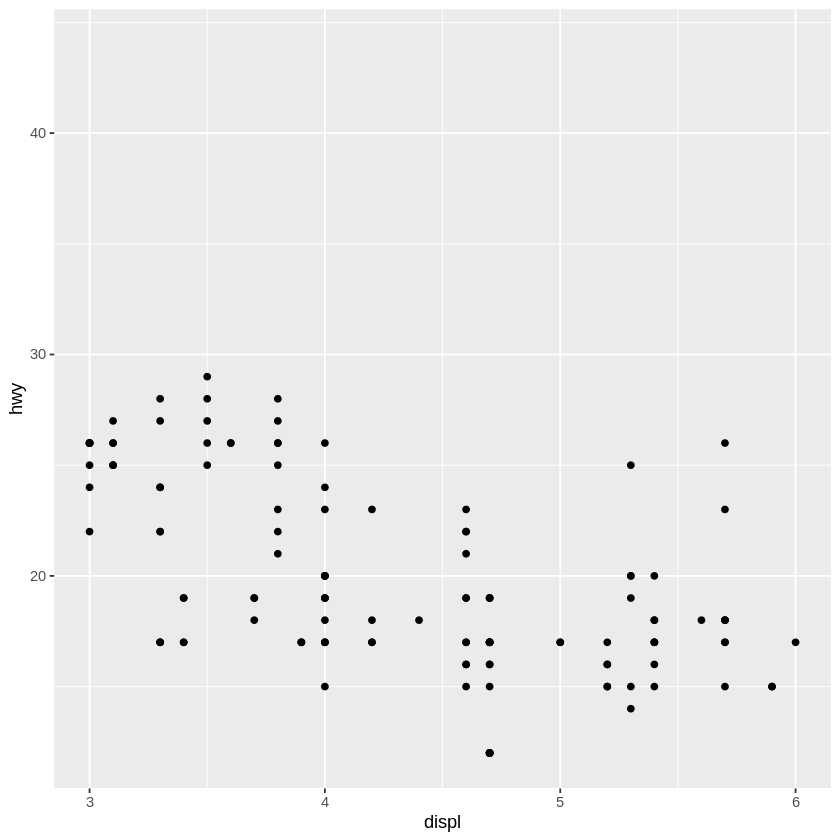

In [4]:
# 3. 축 범위를 조정하는 설정 추가하기 
# x 축 범위 3~6 으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3, 6) 

Warning message:
“Removed 105 rows containing missing values (geom_point).”


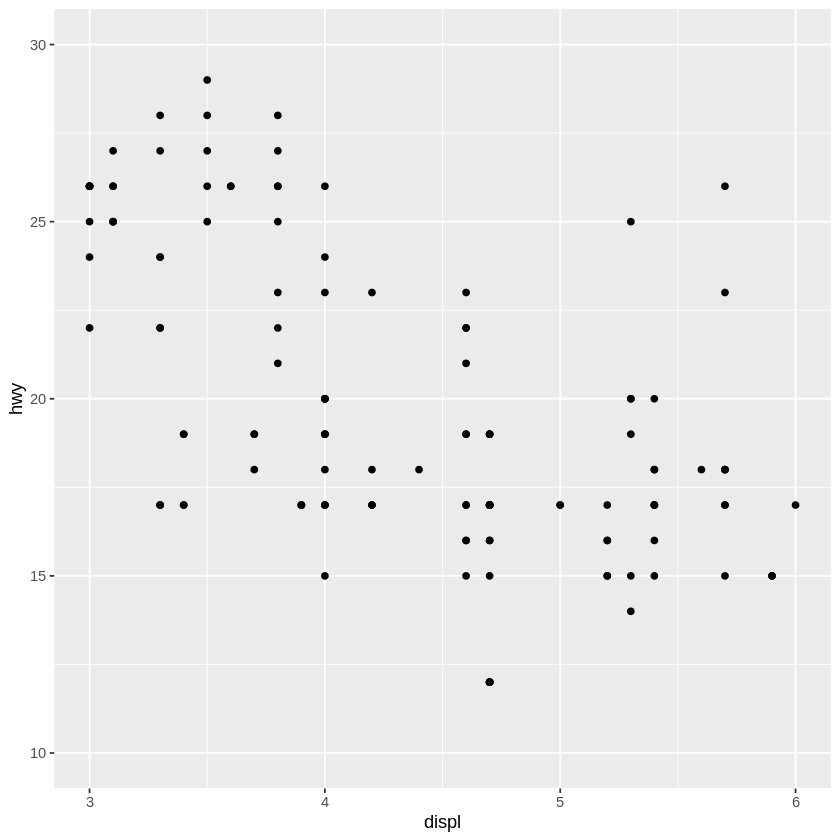

In [5]:
# 3. 축 범위를 조정하는 설정 추가하기 
# x 축 범위 3~6, y 축 범위 10~30 으로 지정
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3, 6) + ylim(10, 30) 

## ggplot() vs qplot() 
- qplot() : 전처리 단계 데이터 확인용 문법 간단, 기능 단순 
- ggplot() : 최종 보고용. 색, 크기, 폰트 등 세부 조작 가능 

## 혼자서 해보기 (1)

Q1. mpg 데이터의 cty(도시 연비)와 hwy(고속도로 연비) 간에 어떤 관계가 있는지 알아보려고 합니다. x 축은 cty, y 축은 hwy 로 된 산점도를 만들어 보세요. 

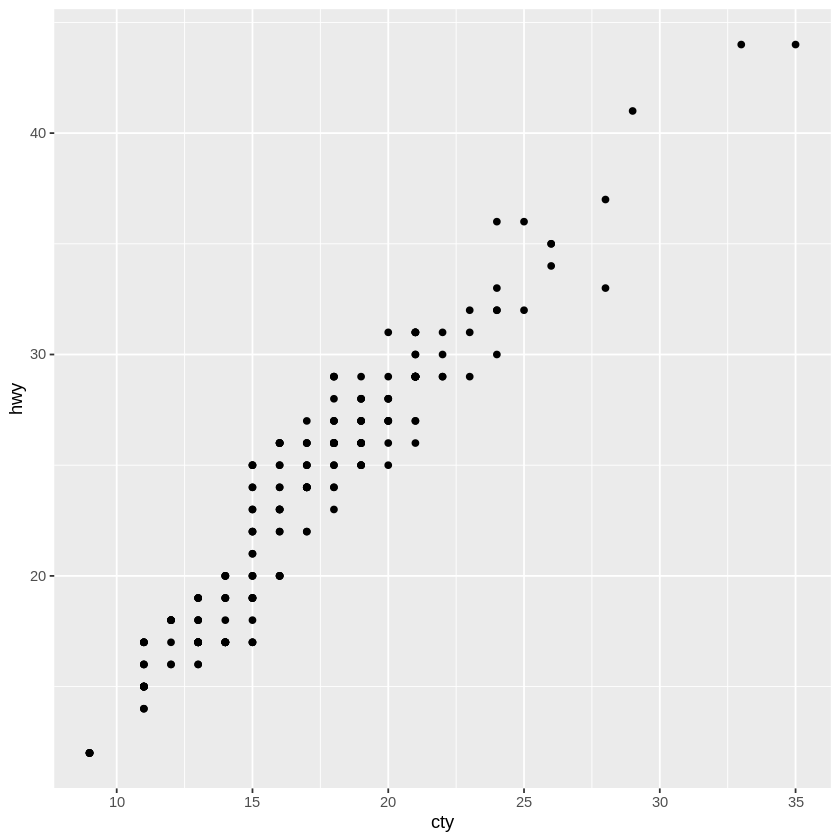

In [6]:
ggplot(data = mpg, aes(x = cty, y = hwy)) + geom_point()

Q2. 미국 지역별 인구통계 정보를 담은 ggplot2 패키지의 midwest 데이터를 이용해서 전체 인구와 아시아인 인구 간에 어떤 관계가 있는지 알아보려고 합니다. x 축은 poptotal(전체 인구), y 축은 popasian(아시아인 인구)으로 된 산점도를 만들어 보세요. 전체 인구는 50 만 명 이하, 아시아인 인구는 1 만 명 이하인 지역만 산점도에 표시되게 설정하세요

Warning message:
“Removed 15 rows containing missing values (geom_point).”


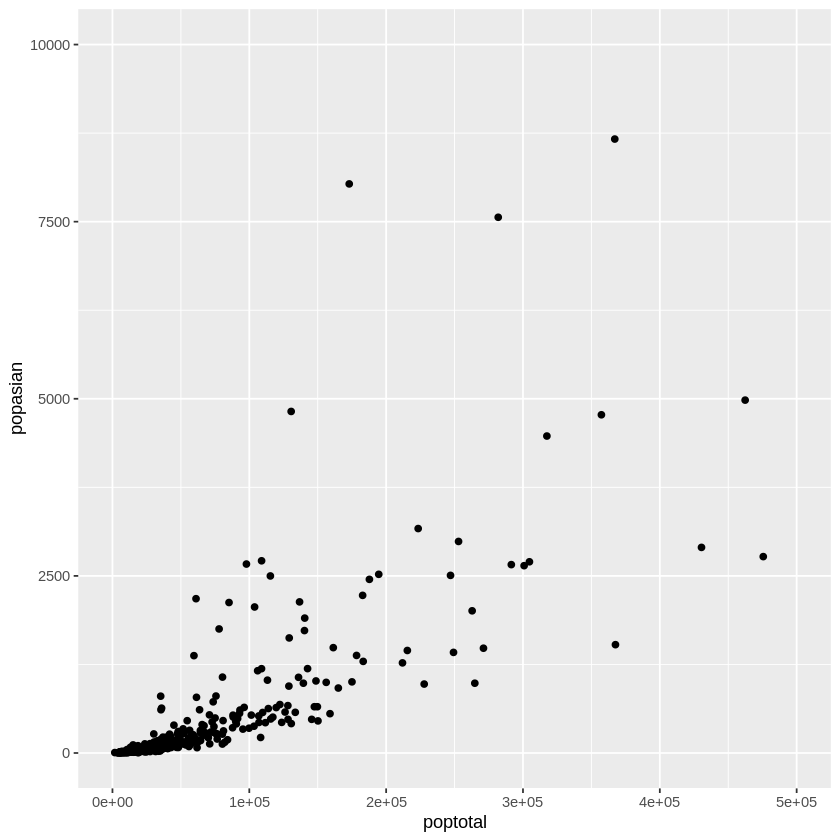

In [7]:
ggplot(data = midwest, aes(x = poptotal, y = popasian)) + geom_point() + xlim(0, 500000) + ylim(0, 10000) 

## 참고 
- 10만 단위가 넘는 숫자는 지수 표기법(Exponential Notation)에 따라 표현됨 
- 1e+05 = 10만(1 × 10의 5승) 
- 정수로 표현하기 : options(scipen = 99) 실행 후 그래프 생성 
- 지수로 표현하기 : options(scipen = 0) 실행 후 그래프 생성 
- R 스튜디오 재실행시 옵션 원상 복구됨 

## 막대 그래프
- 막대 그래프 - 집단 간 차이 표현하기 
- 막대 그래프(Bar Chart) : 데이터의 크기를 막대의 길이로 표현한 그래프 
- 성별 소득 차이처럼 집단 간 차이를 표현할 때 주로 사용 

In [8]:
# 막대 그래프 1 
# 평균 막대 그래프 만들기
# 각 집단의 평균값을 막대 길이로 표현한 그래프 
# 1. 집단별 평균표 만들기 
library(dplyr) 
df_mpg <- mpg %>%   group_by(drv) %>%   summarise(mean_hwy = mean(hwy)) 
df_mpg


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




drv,mean_hwy
<chr>,<dbl>
4,19.17476
f,28.16038
r,21.00000


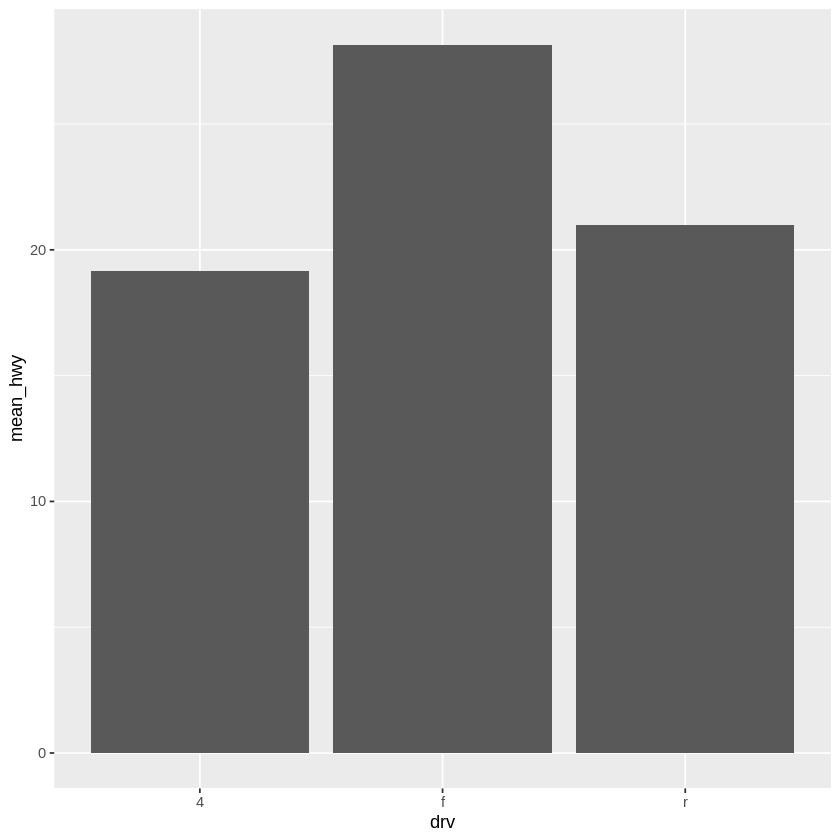

In [9]:
# 2. 그래프 생성하기
ggplot(data = df_mpg, aes(x = drv, y = mean_hwy)) + geom_col() 

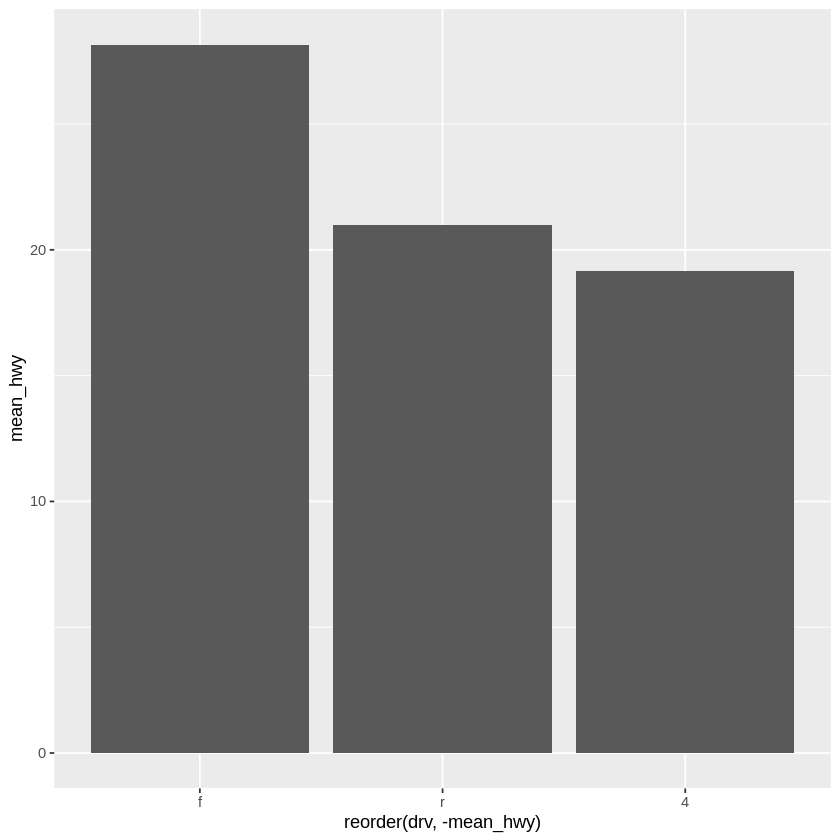

In [10]:
# 3. 크기 순으로 정렬하기 
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) + geom_col() 

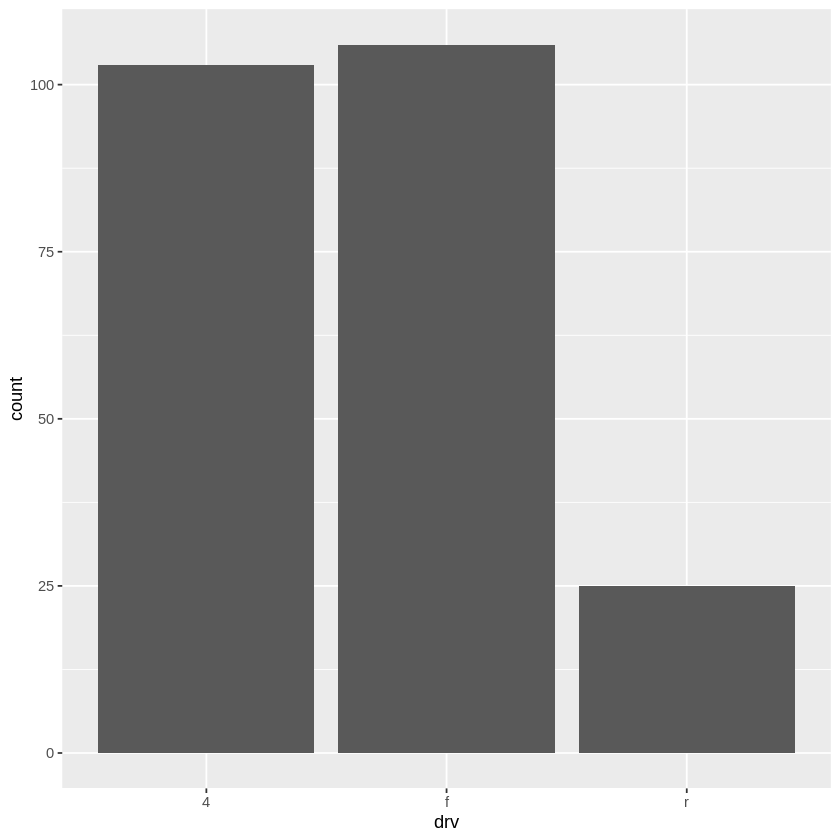

In [11]:
# 막대 그래프 2  
# 빈도 막대 그래프 
# 값의 개수(빈도)로 막대의 길이를 표현한 그래프 
# x 축 범주 변수 , y 축 빈도
ggplot(data = mpg, aes(x = drv)) + geom_bar() 

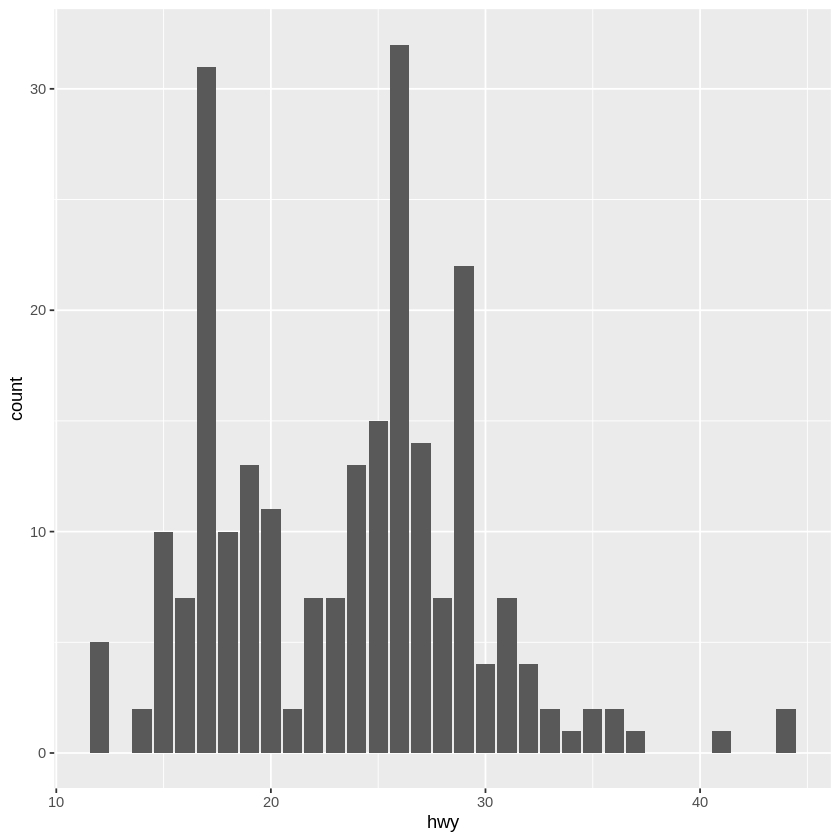

In [12]:
# x 축 연속 변수 , y 축 빈도
ggplot(data = mpg, aes(x = hwy)) + geom_bar() 

## geom_col() VS geom_bar() 
- 평균 막대 그래프 : 데이터를 요약한 평균표를 먼저 만든 후 평균표를 이용해 그래프 생성 - geom_col() 
- 빈도 막대 그래프 : 별도로 표를 만들지 않고 원자료를 이용해 바로 그래프 생성 - geom_bar()

## 혼자서 해보기 (2)

Q1. 어떤 회사에서 생산한 "suv" 차종의 도시 연비가 높은지 알아보려고 합니다. "suv" 차종을 대상으로 평균 cty(도시 연비)가 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요. 막대는 연비 가 높은 순으로 정렬하세요. 

In [22]:
df <- mpg %>% 
      filter(class=='suv') %>%
      group_by(manufacturer) %>% 
      summarise(mean_cty = mean(cty)) %>%
      arrange(desc(mean_cty)) %>%   
      head(5)
df       

manufacturer,mean_cty
<chr>,<dbl>
subaru,18.83333
toyota,14.37500
nissan,13.75000
jeep,13.50000
mercury,13.25000


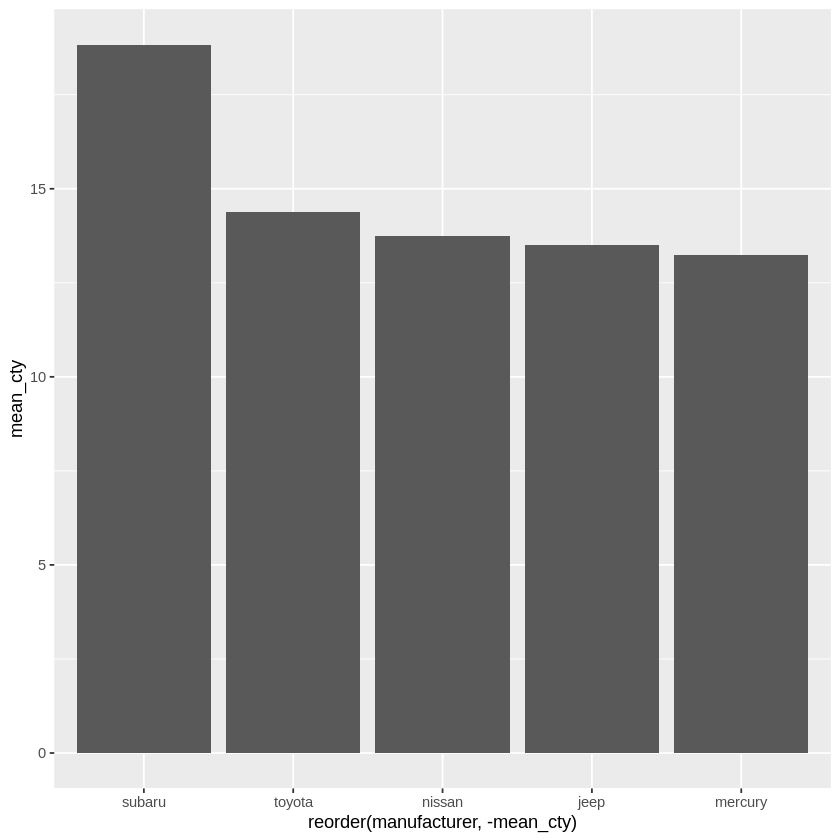

In [23]:
ggplot(data = df, aes(x = reorder(manufacturer, -mean_cty), y = mean_cty)) + geom_col() 

Q2. 자동차 중에서 어떤 class(자동차 종류)가 가장 많은지 알아보려고 합니다. 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보세요. 

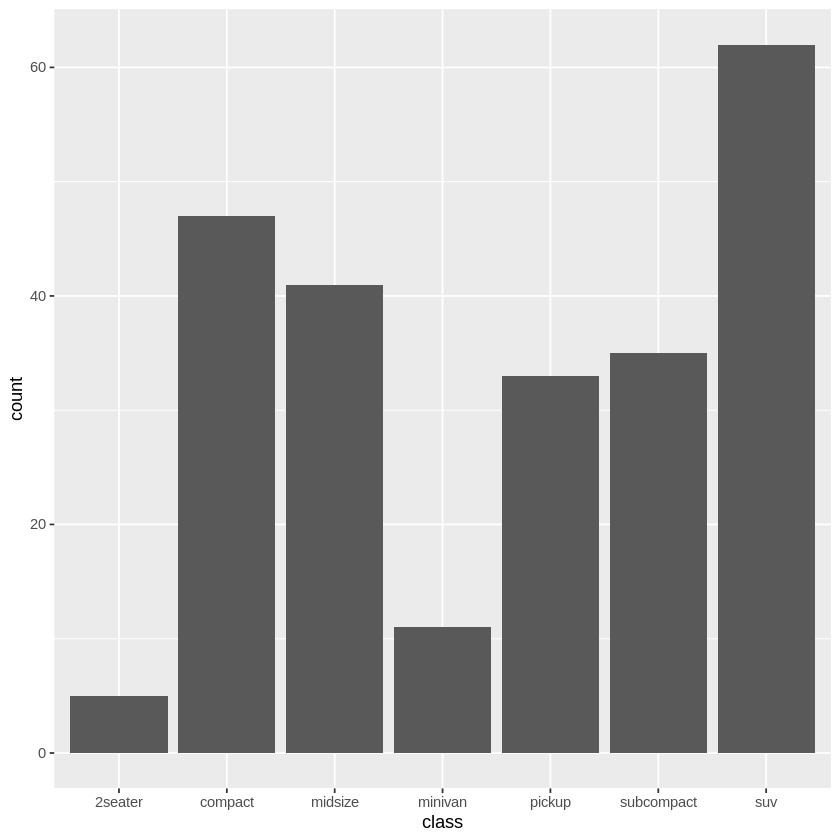

In [24]:
ggplot(data = mpg, aes(x = class)) + geom_bar()

## 선 그래프
- 선 그래프 - 시간에 따라 달라지는 데이터 표현하기 
- 선 그래프(Line Chart) : 데이터를 선으로 표현한 그래프 
- 시계열 그래프(Time Series Chart) : 일정 시간 간격을 두고 나열된 시계열 데이터(Time Series Data)를 선으로 표현한 그래프. 환율, 주가지수 등 경제 지표가 시간에 따라 어떻게 변하는지 표현할 때 활용 

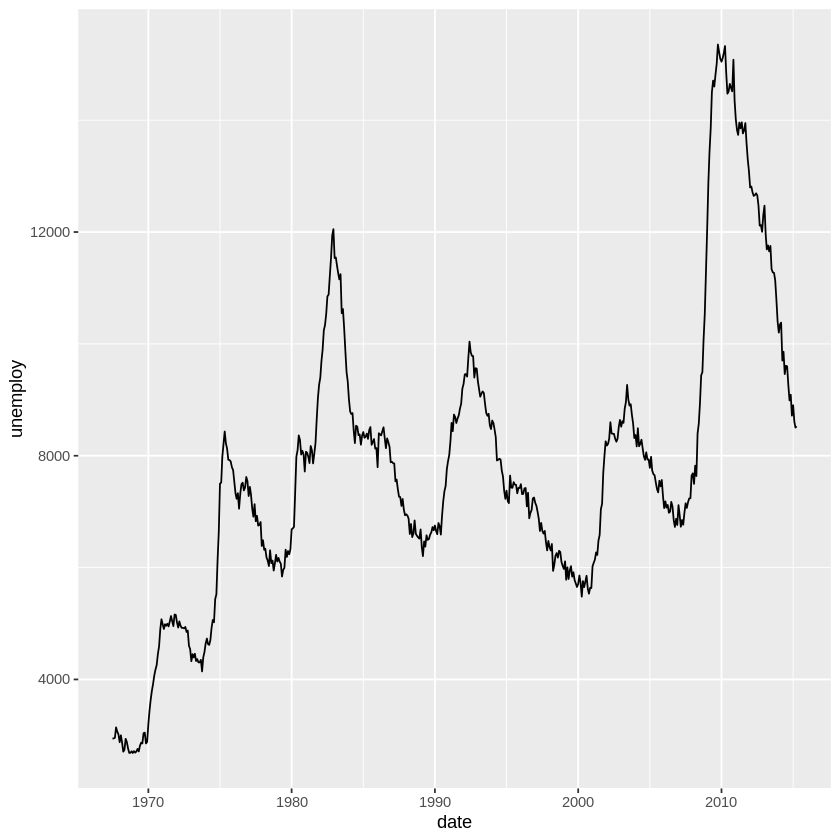

In [25]:
# 시계열 그래프 만들기 
ggplot(data = economics, aes(x = date, y = unemploy)) + geom_line() 

## 혼자서 해보기 (3)

Q1. psavert(개인 저축률)가 시간에 따라서 어떻게 변해왔는지 알아보려고 합니다. 시간에 따른 개인 저축률의 변화를 나타낸 시계열 그래프를 만들어 보세요. 

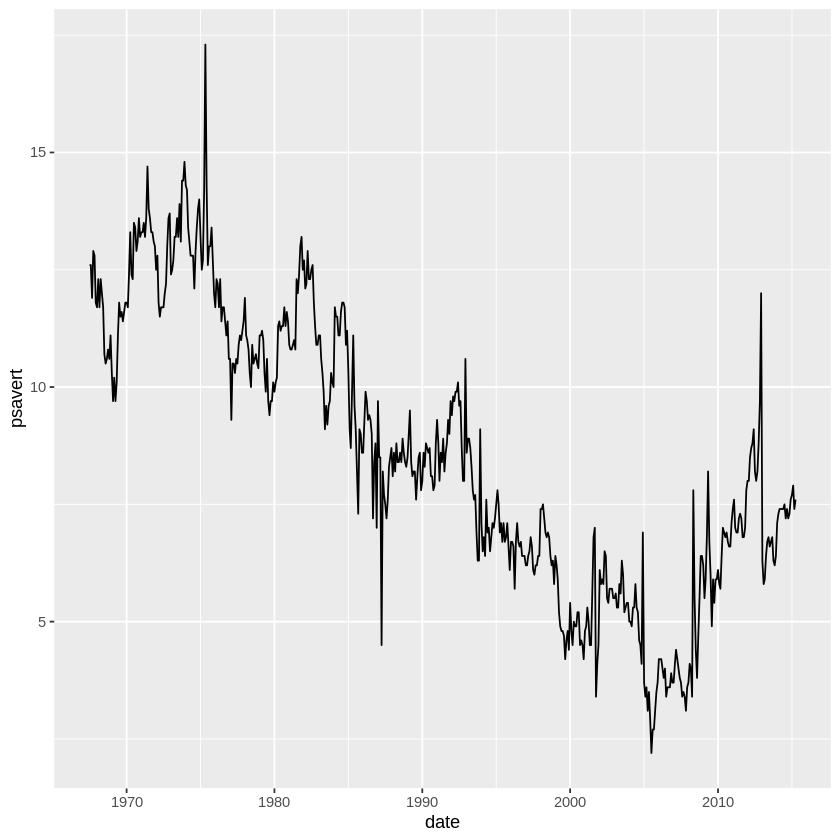

In [26]:
ggplot(data = economics, aes(x = date, y = psavert)) + geom_line()

## 상자 그림
- 상자 그림 - 집단 간 분포 차이 표현하기 
- 상자 그림(Box Plot) : 데이터의 분포(퍼져 있는 형태)를 직사각형 상자 모양으로 표현한 그래프 
- 분포를 알 수 있기 때문에 평균만 볼 때보다 데이터의 특성을 좀 더 자세히 이해할 수 있음 

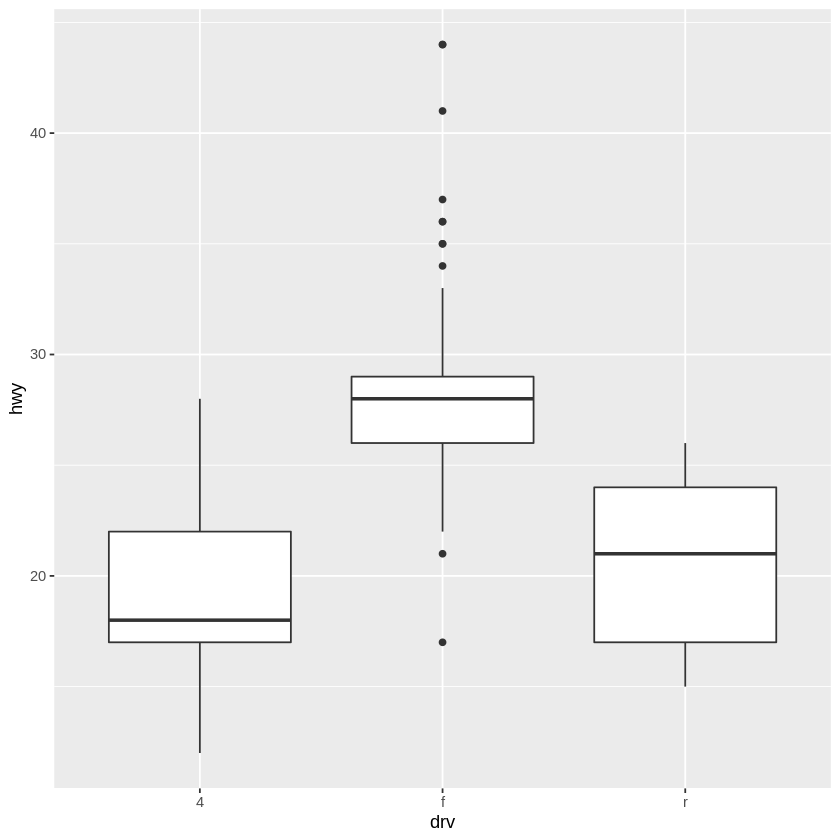

In [27]:
# 상자 그림 만들기 
ggplot(data = mpg, aes(x = drv, y = hwy)) + geom_boxplot() 

|상자 그림| 값| 설명|
|--|--|--|
|상자 아래 세로선| 아래 수염| 하위 0~25% 내에 해당하는 값|
| 상자 밑면| 1사분위수(Q1)| 하위 25% 위치 값 |
|상자 내 굵은 선| 2사분위수(Q2) |하위 50% 위치 값(중앙값)|
| 상자 윗면 |3사분위수(Q3) |하위 75% 위치 값|
| 상자 위 세로선 |윗수염 하위 75~100% 내에 해당하는 값| 상자 밖 점 표식 극단치 Q1, Q3 밖 1.5 IQR을 벗어난 값|

- 참고 1.5 IQR: 사분위 범위(Q1~Q3간 거리)의 1.5배

## 혼자서 해보기(4)

Q1. class(자동차 종류)가 "compact", "subcompact", "suv"인 자동차의 cty(도시 연비)가 어떻게 다른지 비교해보려고 합니다. 세 차종의 cty를 나타낸 상자 그림을 만들어보세요. 

In [0]:
df_mpg <- mpg %>% filter(class %in% c("compact", "subcompact", "suv"))

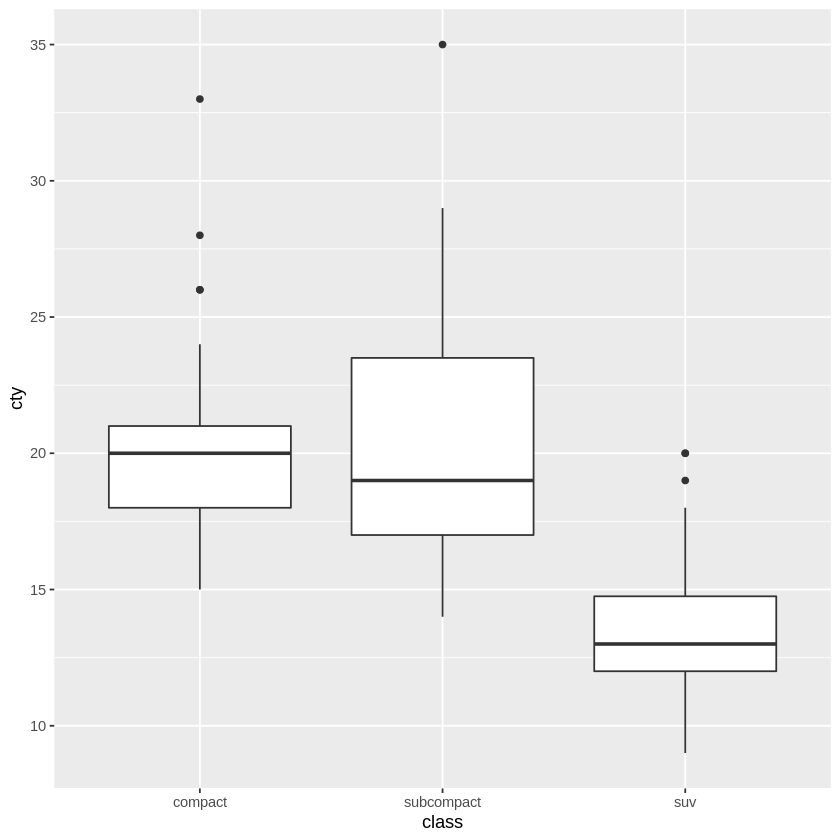

In [32]:
ggplot(data = df_mpg, aes(x = class, y = cty)) + geom_boxplot() 

-앞에서 다룬 ggplot2 함수들 

|값| 내용|
|--|--|
| geom_point() |산점도|
| geom_col()| 막대 그래프 - 요약표|
| geom_bar()| 막대 그래프 - 원자료|
| geom_line()| 선 그래프 geom_boxplot() 상자 그림 |

## 정리하기

In [0]:
# 1. 산점도
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() 
 
# 축 설정 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) +   geom_point() +   xlim(3, 6) +   ylim(10, 30) 
 
# 2. 평균 막대 그래프

# 1 단계 . 평균표 만들기
df_mpg <- mpg %>%   group_by(drv) %>%   summarise(mean_hwy = mean(hwy)) 
 
# 2 단계 . 그래프 생성하기 , 크기순 정렬하기
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) + geom_col() 
 
# 3. 빈도 막대 그래프
ggplot(data = mpg, aes(x = drv)) + geom_bar() 
 
  
# 4. 선 그래프
ggplot(data = economics, aes(x = date, y = unemploy)) + geom_line() 
 
# 5. 상자 그림
ggplot(data = mpg, aes(x = drv, y = hwy)) + geom_boxplot() 